<a href="https://colab.research.google.com/github/tara618/symmetrical-octo-palm-tree/blob/main/ML_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv('./x.csv')
df.head(10)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,a_846_jpg.rf.16ae5101af82219ebb320a9848f8ad80.jpg,720,404,6,138,11,295,211
1,a_144_jpg.rf.1e2dff958e04ae1f6ce93627c8ef281a.jpg,720,404,11,135,285,278,375
2,a_124_jpg.rf.157aebd9cf9c92cc819b6ec92a7183fd.jpg,720,404,10,222,316,437,402
3,no_9_jpg.rf.207063dcdefd0a9c4c30d682c6bb5d9b.jpg,2304,1440,10,864,980,1424,1206
4,surgery_5_jpg.rf.14697c20b72556a364ce21b3ab930...,2304,1440,13,1129,750,1516,994
5,a_933_jpg.rf.14b069909e8faef35f91cf0173c84bf0.jpg,720,404,11,172,212,268,276
6,a_311_jpg.rf.2544fe462a2807b99b05fedaf5c49e72.jpg,720,404,6,160,34,334,252
7,a_123_jpg.rf.2389dca6f0653e955bb7d04f5a585037.jpg,720,404,10,231,269,426,386
8,a_173_jpg.rf.23ff24582f38cad8e1126017b5688029.jpg,720,404,13,290,254,453,404
9,a_899_jpg.rf.23dff9b5995099519d4478f0c89342ee.jpg,720,404,9,285,169,390,297


In [ ]:
width_mean= df['width'].mean()
height_mean = df['height'].mean()
class_mean = df['class'].mean()
xmin_mean = df['xmin'].mean()
ymin_mean = df['ymin'].mean()
xmax_mean = df['xmax'].mean()
ymax_mean = df['ymax'].mean()

print(f"Mean of width: {width_mean}, height :{height_mean}, class :{class_mean}")
print(f"xmin :{xmin_mean}, ymin :{ymin_mean}, xmax :{xmax_mean}, ymax :{ymax_mean}")

Mean of width: 1191.6404494382023, height :712.4719101123595, class :7.544943820224719
xmin :444.2022471910112, ymin :311.89325842696627, xmax :646.6910112359551, ymax :516.4662921348314


In [ ]:
width_std = np.std(df['width'])
height_std = np.std(df['height'])
class_std = np.std(df['class'])
xmin_std =np.std(df['xmin'])
ymin_std =np.std(df['ymin'])
xmax_std =np.std(df['xmax'])
ymax_std =np.std(df['ymax'])

print(f"Standard Deviation of width: {width_std}, height :{height_std}, class :{class_std}")
print(f" xmin :{xmin_std}, ymin :{ymin_std}, xmax : {xmax_std}, ymax : {ymax_std}")

Standard Deviation of width: 724.3160624781443, height :473.73197015616, class :4.0972314915952985
 xmin :329.2429921199822, ymin :247.5994065710305, xmax : 413.87057634500417, ymax : 329.8411117131086


In [ ]:
class_means = df.groupby('class')[['xmin', 'ymin', 'xmax', 'ymax']].mean()

print(class_mean)

class1 = 10
class2 = 11

centroid1 = class_means.loc[class1].values
centroid2 = class_means.loc[class2].values
distance = np.linalg.norm(centroid1 - centroid2)

print(f"Distance between class {class1} and class {class2} centroids is: {distance}")

7.544943820224719
Distance between class 10 and class 11 centroids is: 209.33287803527332


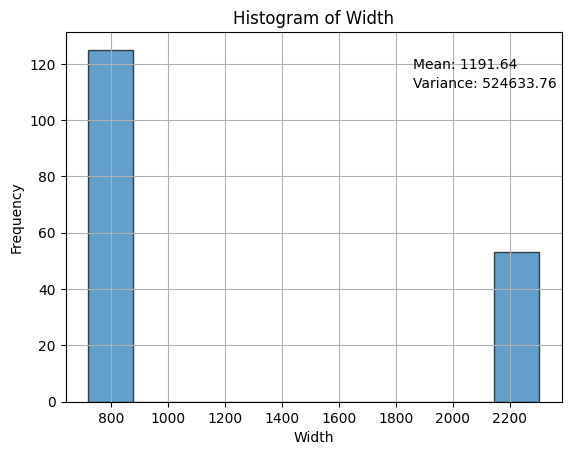

In [ ]:
width_values = df['width']
width_values

hist, bins = np.histogram(width_values, bins=10)

mean_width = np.mean(width_values)
variance_width = np.var(width_values)

plt.text(0.7, 0.9, f'Mean: {mean_width:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f'Variance: {variance_width:.2f}', transform=plt.gca().transAxes)

plt.hist(width_values, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of Width')
plt.grid(True)
plt.show()

<ipython-input-8-cc61c950818c>:8: RuntimeWarning: invalid value encountered in double_scalars
  distance = np.power(np.abs(vector1 - vector2), r).sum() ** (1 / r)


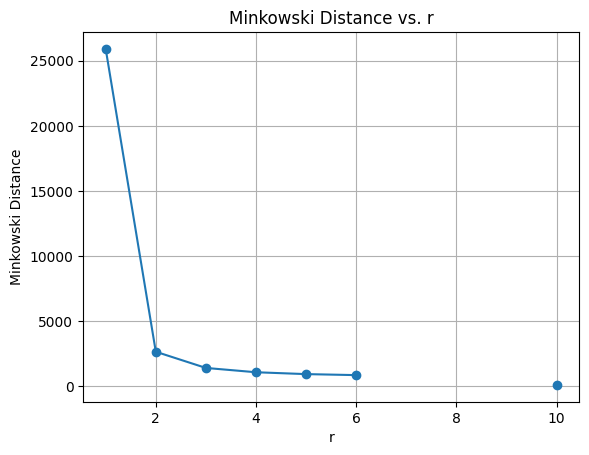

In [ ]:
vector1 = df['xmax']
vector2 = df['ymax']
distances = []
r_values = np.arange(1, 11)
for r in r_values:
    distance = np.power(np.abs(vector1 - vector2), r).sum() ** (1 / r)
    distances.append(distance)

plt.plot(r_values, distances, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
list = ['width','height','xmin','ymin','xmax','ymax']
X = df[list]
y = df["class"]

X_train , X_test ,y_train  , y_test   = train_test_split(X,y,test_size=0.3)


print(f"X_train :{X_train}")
print(f"X_test :{X_test}")
print(f"y_train :{y_train}")
print(f"y_test :{y_test}")

X_train :     width  height  xmin  ymin  xmax  ymax
160   2304    1440   792   850   992  1104
142   2304    1440   835   996  1492  1254
90    2304    1440  1008   630  1260  1040
71     720     404   302   174   443   268
18     720     404   273   180   358   259
..     ...     ...   ...   ...   ...   ...
42     720     404   264   205   393   376
176   2304    1440   837   998  1456  1242
167    720     404   273   154   395   299
124    720     404   163    74   279   299
63     720     404   150    38   324   253

[124 rows x 6 columns]
X_test :     width  height  xmin  ymin  xmax  ymax
79    2304    1440  1060   492  1422   934
67    2304    1440   801   878   981  1096
37     720     404   244   232   383   396
169    720     404   267   149   398   301
49     720     404   136    20   304   247
137    720     404   262   126   385   290
153   2304    1440   992   788  1230  1126
57     720     404   253   133   390   283
22    2304    1440   949   698  1257  1006
69     720   

In [ ]:
from  sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) # n_neighbors default is 5

neigh.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh_score_k3 = neigh.score(X_test, y_test)
print(neigh_score_k3)

0.9259259259259259


In [ ]:
print(neigh.predict(X_test))

[ 8 11  7  9  6  1  3  1  1 13  3  5 11  1 13  2 13  2  3  6 12  5  6 10
 11  6 13 13  9  2  6 11  5  8 11 13  3  4 12  0 13  4  2  6 13 13  5 10
 13  1  9  8  1  1]


[ 8 11  7  9  6  7  3  1  1 13  7  5 11  1 13  2 13  2  3  6 12  5  6 10
 11  6 13 13  9 10  6 11  5  8 11 13  3  4 12  0 13  4  2  6 13 13  5 10
 13  1  9 13  1  1]
Accuracy prediction of : k=1: 1.0 and for k=3: 0.9259259259259259


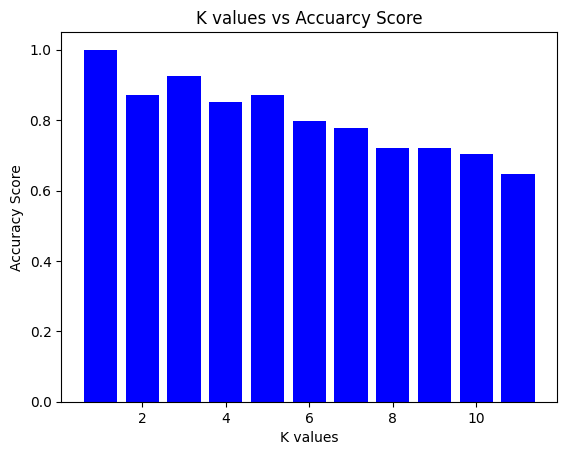

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)
neigh_score_k1=neigh.score(X_test, y_test)
print(neigh.predict(X_test))
print(f'Accuracy prediction of : k=1: {neigh_score_k1} and for k=3: {neigh_score_k3}')

x_axis= np.arange(1,12)
y_axis=[]

for i in range(1,12):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X, y)
    y_axis.append(neigh.score(X_test, y_test))

plt.bar(x_axis,y_axis,color='blue')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('K values vs Accuarcy Score')
plt.show()